In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [16]:
import sys
sys.path.append('C:/Users/gabri/Github/Climatologia')
import climsy as cs
import matplotlib.pyplot as plt

# Hourly to Daily data

In [3]:
vwnd = cs.get_dataset("/home/gabriel/_Gabriel/Estudo/netcdf/vwnd_700hpa_hourly.nc", 'ERA-5')
vwnd = vwnd.formatter(time=['1979-01-01','2018-12-01'],freq='daily')

vwnd.dataset.to_netcdf("/home/gabriel/_Gabriel/Estudo/netcdf/vwnd_700hpa_daily.nc")

In [4]:
uwnd = cs.get_dataset("/home/gabriel/_Gabriel/Estudo/netcdf/uwnd_700hpa_hourly.nc", 'ERA-5')
uwnd = uwnd.formatter(time=['1979-01-01','2018-12-01'],freq='daily')

uwnd.dataset.to_netcdf("/home/gabriel/_Gabriel/Estudo/netcdf/uwnd_700hpa_daily.nc")

# Series 

In [5]:
uwnd500 = cs.get_dataset("D:/_Gabriel/Estudo/UFF/Bloqueios_Atmosfericos/nc/uwnd_500hpa_daily.nc", 'ERA-5')
vwnd500 = cs.get_dataset("D:/_Gabriel/Estudo/UFF/Bloqueios_Atmosfericos/nc/vwnd_500hpa_daily.nc", 'ERA-5')

In [6]:
div_500hpa = uwnd500.formatter(data_2=vwnd500, opr='divergence')

div_500hpa.dataset.attrs['level']=500

div_500hpa.dataset.to_netcdf("D:/netcdf/Vento/div_500hpa_daily.nc")

In [7]:
vort_500hpa = uwnd500.formatter(data_2=vwnd500, opr='vorticity')

vort_500hpa.dataset.attrs['level']=500
vort_500hpa.dataset.to_netcdf("D:/netcdf/Vento/vort_500hpa_daily.nc")

In [9]:
TSdiv500 = div_500hpa.loess()

In [21]:
TSdiv500.dataset.to_netcdf("D:/netcdf/Vento/divTS_500hpa.nc")

In [26]:
TSdiv500.dataset.to_dataframe()

div variable
lat   lon   time                             
-25.0 -60.0 1979-01-01  4.354297e+12      div
            1979-01-02  4.481575e+12      div
            1979-01-03  3.736828e+12      div
            1979-01-04  2.504264e+12      div
            1979-01-05  1.415916e+12      div
...                              ...      ...
-10.0 -40.0 2018-11-27 -5.056958e+12      div
            2018-11-28 -4.364659e+12      div
            2018-11-29 -2.508158e+12      div
            2018-11-30  3.395349e+11      div
            2018-12-01  3.305753e+12      div

[35871660 rows x 2 columns]

C:\Users\gabri\miniconda3\envs\gab\lib\site-packages\xarray\core\common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


AttributeError: 'MultiIndex' object has no attribute 'strftime'

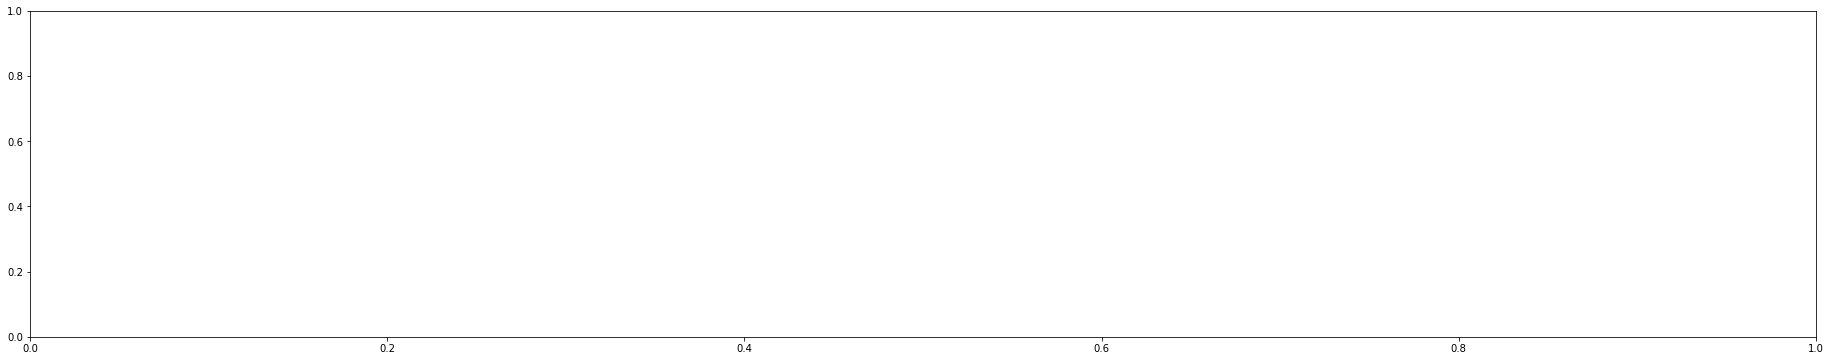

In [25]:
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(32,6))
TSdiv500.data_view.series(ax=0)